In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import datasets,svm,metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
digits = datasets.load_digits()

(1797, 64)
(1797,)
<class 'numpy.ndarray'>
[[[  0.   0.   5. ...,   1.   0.   0.]
  [  0.   0.  13. ...,  15.   5.   0.]
  [  0.   3.  15. ...,  11.   8.   0.]
  ..., 
  [  0.   4.  11. ...,  12.   7.   0.]
  [  0.   2.  14. ...,  12.   0.   0.]
  [  0.   0.   6. ...,   0.   0.   0.]]

 [[  0.   0.   0. ...,   5.   0.   0.]
  [  0.   0.   0. ...,   9.   0.   0.]
  [  0.   0.   3. ...,   6.   0.   0.]
  ..., 
  [  0.   0.   1. ...,   6.   0.   0.]
  [  0.   0.   1. ...,   6.   0.   0.]
  [  0.   0.   0. ...,  10.   0.   0.]]

 [[  0.   0.   0. ...,  12.   0.   0.]
  [  0.   0.   3. ...,  14.   0.   0.]
  [  0.   0.   8. ...,  16.   0.   0.]
  ..., 
  [  0.   9.  16. ...,   0.   0.   0.]
  [  0.   3.  13. ...,  11.   5.   0.]
  [  0.   0.   0. ...,  16.   9.   0.]]

 ..., 
 [[  0.   0.   1. ...,   1.   0.   0.]
  [  0.   0.  13. ...,   2.   1.   0.]
  [  0.   0.  16. ...,  16.   5.   0.]
  ..., 
  [  0.   0.  16. ...,  15.   0.   0.]
  [  0.   0.  15. ...,  16.   0.   0.]
  [  0.   0.   

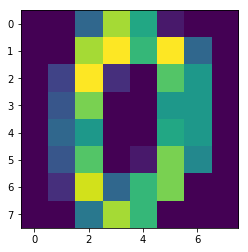

In [13]:
plt.imshow(digits.images[0])
print(digits.data.shape)
print(digits.target.shape)
print(type(digits.data))
print(digits.images)

In [12]:
x_train,x_test,y_train,y_test = train_test_split(digits.data,digits.target,random_state=0)
print(x_train.shape)
print(x_test.shape)
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
print(knn.score(x_train,y_train))
print(knn.score(x_test,y_test))

(1347, 64)
(450, 64)
0.991091314031
0.98


In [32]:
import torch
import torch.nn as nn
import torchvision.datasets as normal_datasets
import torchvision.transforms as transforms
from torch.autograd import Variable
import numpy as np
 
num_epochs = 5
# batch_size = 100
learning_rate = 0.001
 
 
# 将数据处理成Variable, 如果有GPU, 可以转成cuda形式
def get_variable(x):
    x = Variable(x)
    return x.cuda() if torch.cuda.is_available() else x
 
 
# 从torchvision.datasets中加载一些常用数据集
# train_dataset = normal_datasets.MNIST(
#     root="./data/",  # 数据集保存路径
#     train=True,  # 是否作为训练集
#     transform=transforms.ToTensor(),  # 数据如何处理, 可以自己自定义
#     download=True)  # 路径下没有的话, 可以下载
 
# 见数据加载器和batch
# test_dataset = normal_datasets.MNIST(root="./data/",
#                                      train=False,
#                                      transform=transforms.ToTensor())
 
# train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
#                                            batch_size=batch_size,
#                                            shuffle=True)
 
# test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
#                                           batch_size=batch_size,
#                                           shuffle=False)
 
# 两层卷积
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        # 使用序列工具快速构建
        self.conv1 = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=5, padding=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(2))
        self.conv2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2))
        self.fc = nn.Linear(7 * 7 * 32, 10)
 
    def forward(self, x):
        out = self.conv1(x)
        out = self.conv2(out)
        out = out.view(out.size(0), -1)  # reshape
        out = self.fc(out)
        return out
 
 
cnn = CNN()
if torch.cuda.is_available():
    cnn = cnn.cuda()
 
# 选择损失函数和优化方法
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(cnn.parameters(), lr=learning_rate)

X_data = torch.from_numpy(digits.data.astype(np.float32))
X = X_data.reshape(-1,8,8,1)
Y_data = torch.from_numpy(digits.target.astype(np.float32).reshape(-1,1))
images = get_variable(X)
labels = get_variable(Y_data)
print(images.shape)
# outputs = cnn(images)
# i = 0
# for epoch in range(num_epochs):
#         i += 1
#         outputs = cnn(images)
#         loss = loss_func(outputs, labels)
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()
#         if i%100==0:
#             print(loss)
#         if (i + 1) % 100 == 0:
#             print
#             print('Epoch [%d/%d], Iter [%d/%d] Loss: %.4f'
#                   % (epoch + 1, num_epochs, i + 1, len(train_dataset) // batch_size, loss.item()))
 
 
# # # Save the Trained Model
# # torch.save(cnn.state_dict(), 'cnn.pkl')

torch.Size([1797, 8, 8, 1])


RuntimeError: Given groups=1, weight of size 16 1 5 5, expected input[1797, 8, 8, 1] to have 1 channels, but got 8 channels instead

In [ ]:
X_data = digits.data.astype(np.float32)
Y_data = digits.target.astype(np.float32).reshape(-1,1)
# 归一化处理：最小最大值标准化
X_data = MinMaxScaler().fit_transform(X_data)
# 转换为图片的格式 （batch，height，width，channels）
X = X_data.reshape(-1,8,8,1)

uint8
(427, 640, 3)
[[[174 201 231]
  [174 201 231]
  [174 201 231]
  ..., 
  [250 251 255]
  [250 251 255]
  [250 251 255]]

 [[172 199 229]
  [173 200 230]
  [173 200 230]
  ..., 
  [251 252 255]
  [251 252 255]
  [251 252 255]]

 [[174 201 231]
  [174 201 231]
  [174 201 231]
  ..., 
  [252 253 255]
  [252 253 255]
  [252 253 255]]

 ..., 
 [[ 88  80   7]
  [147 138  69]
  [122 116  38]
  ..., 
  [ 39  42  33]
  [  8  14   2]
  [  6  12   0]]

 [[122 112  41]
  [129 120  53]
  [118 112  36]
  ..., 
  [  9  12   3]
  [  9  15   3]
  [ 16  24   9]]

 [[116 103  35]
  [104  93  31]
  [108 102  28]
  ..., 
  [ 43  49  39]
  [ 13  21   6]
  [ 15  24   7]]]


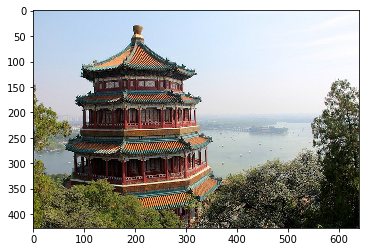

In [39]:
from sklearn import datasets
china = datasets.load_sample_image('china.jpg')
print(china.dtype)
print(china.shape)
plt.imshow(china)
print(china)
# outputs = cnn(china)

In [42]:
import torch
from torch import nn



class simpleCNN(nn.Module):
    def __init__(self):
        super(simpleCNN, self).__init__()
        # (3,32,32)
        layer1 = nn.Sequential()
        layer1.add_module('conv1',nn.Conv2d(3,32,3,1,padding=1))
        # (32-3+2*1)/1 + 1 =32 (32,32,,32)
        layer1.add_module('relu1',nn.ReLU(True))
        layer1.add_module('pool1',nn.MaxPool2d(2,2))
        self.layer1 = layer1

        layer2 = nn.Sequential()
        layer2.add_module('conv2',nn.Conv2d(3,32,3,1,padding=1))
        layer2.add_module('relu2',nn.ReLU(True))
        layer2.add_module('pool2',nn.Conv2d(32,64,3,1,padding=1))
        self.layer2 = layer2

        layer3 = nn.Sequential()
        layer3.add_module("conv3",nn.Conv2d(64,128,3,1,padding=1))
        layer3.add_module('relu3',nn.ReLU(True))
        layer3.add_module('pool3',nn.MaxPool2d(2,2))
        self.layer3 = layer3

        layer4 = nn.Sequential()
        layer4.add_module('fc1',nn.Linear(2048,512))
        layer4.add_module('fc_relu1',nn.ReLU(True))
        layer4.add_module('fc2',nn.Linear(512,64))
        layer4.add_module('fc_relu2',nn.ReLU(True))
        layer4.add_module('fc3',nn.Linear(64,10))
        self.layer4 = layer4

    def forward(self, input):
        conv1 = self.layer1(input)
        conv2 = self.layer2(conv1)
        conv3 = self.layer3(conv2)
        fc_input = conv3.view(conv3.size(0),-1)
        fc_out = self.layer4(fc_input)

        return fc_out

model = simpleCNN()
m = nn.Dropout(p=0.5)
input = torch.autograd.Variable(torch.randn(3, 3))
print(input)
output = m(input)
print(output)

tensor([[-1.8087, -0.9418,  1.3464],
        [ 1.2152, -1.2448,  0.3104],
        [ 0.6381, -0.1416, -0.4208]])
tensor([[-3.6174, -1.8837,  2.6928],
        [ 2.4304, -2.4897,  0.0000],
        [ 0.0000, -0.2831, -0.0000]])
